In [1]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox

def gamma_correction(image, gamma=1.0):
    gamma_corrected = np.uint8(cv2.pow(image / 255.0, gamma) * 255)
    return gamma_corrected

def clahe_equalization(image, clip_limit=2.0, grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    # Apply CLAHE
    equalized_image = clahe.apply(image)
    return equalized_image

def linear_stretching(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = np.uint8((image - min_val) * (255.0 / (max_val - min_val)))
    return stretched_image

def apply_correction(image, correction_type, parameter=None):
    if correction_type == "Gamma Correction":
        corrected_image = gamma_correction(image, gamma=parameter)
    elif correction_type == "Histogram Equalization":
        corrected_image = histogram_equalization(image)
    elif correction_type == "Linear Stretching":
        corrected_image = linear_stretching(image)
    
    return corrected_image
    

def open_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = cv2.imread(file_path)
        return image
    return None

def update_parameter(value):
    global clip_limit
    clip_limit = float(value)

def correct_image():
    image = open_file()
    if image is None:
        messagebox.showerror("Error", "No image selected!")
        return
    
    correction_type = technique_var.get()
    parameter = None
    
    if correction_type == "Gamma Correction":
        parameter = gamma_var.get()
    elif correction_type == "Histogram Equalization":
        parameter = None
    elif correction_type == "Linear Stretching":
        parameter = None
    
    corrected_image = apply_correction(image, correction_type, parameter)
    cv2.imshow("Corrected Image", corrected_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Create GUI
root = tk.Tk()
root.title("Image Correction Model")

# Technique Selection
tk.Label(root, text="Select Correction Technique:").pack()
technique_var = tk.StringVar(root)
technique_var.set("Gamma Correction")
technique_options = ["Gamma Correction", "Histogram Equalization", "Linear Stretching"]
tk.OptionMenu(root, technique_var, *technique_options).pack()

# Gamma Value (for Gamma Correction)
gamma_var = tk.DoubleVar(root)
gamma_var.set(1.0)
tk.Label(root, text="Gamma Value (for Gamma Correction):").pack()
tk.Scale(root, variable=gamma_var, from_=0.1, to=3.0, resolution=0.1, orient="horizontal").pack()

# Button to Correct Image
tk.Button(root, text="Correct Image", command=correct_image).pack()

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\yashw\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\yashw\AppData\Local\Temp\ipykernel_22276\3011829275.py", line 62, in correct_image
    corrected_image = apply_correction(image, correction_type, parameter)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yashw\AppData\Local\Temp\ipykernel_22276\3011829275.py", line 28, in apply_correction
    corrected_image = histogram_equalization(image)
                      ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'histogram_equalization' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\yashw\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\yashw\AppData

In [3]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox

def gamma_correction(image, gamma=1.0):
    gamma_corrected = np.uint8(cv2.pow(image / 255.0, gamma) * 255)
    return gamma_corrected

def histogram_equalization(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(image)
    # Convert the equalized grayscale image to colored by replicating the equalized intensity values across all three color channels
    equalized_colored_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)
    return equalized_colored_image

def linear_stretching(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = np.uint8((image - min_val) * (255.0 / (max_val - min_val)))
    return stretched_image

def apply_correction(image, correction_type, parameter=None):
    if correction_type == "Gamma Correction":
        corrected_image = gamma_correction(image, gamma=parameter)
    elif correction_type == "Histogram Equalization":
        corrected_image = histogram_equalization(image)
    elif correction_type == "Linear Stretching":
        corrected_image = linear_stretching(image)
    return corrected_image

def open_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = cv2.imread(file_path)
        return image
    return None

def correct_image():
    image = open_file()
    if image is None:
        messagebox.showerror("Error", "No image selected!")
        return
    
    correction_type = technique_var.get()
    parameter = None
    
    if correction_type == "Gamma Correction":
        parameter = gamma_var.get()
    elif correction_type == "Histogram Equalization":
        parameter = None
    elif correction_type == "Linear Stretching":
        parameter = None
    
    corrected_image = apply_correction(image, correction_type, parameter)
    
    # Resize images for display
    original_resized = cv2.resize(image, (500, 500))
    corrected_resized = cv2.resize(corrected_image, (500, 500))
    
    # Display original and corrected images side by side
    cv2.imshow("Original Image", original_resized)
    cv2.imshow("Corrected Image", corrected_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Create GUI
root = tk.Tk()
root.title("Image Correction")

# Select Correction Technique
tk.Label(root, text="Select Correction Technique:").pack()
technique_var = tk.StringVar(root)
technique_var.set("Gamma Correction")
technique_options = ["Gamma Correction", "Histogram Equalization", "Linear Stretching"]
tk.OptionMenu(root, technique_var, *technique_options).pack()

# Gamma Value (for Gamma Correction)
gamma_var = tk.DoubleVar(root)
gamma_var.set(1.0)
gamma_scale = tk.Scale(root, variable=gamma_var, from_=0.1, to=3.0, resolution=0.1, orient="horizontal")
gamma_scale.pack()

# Upload Button
tk.Button(root, text="Upload Image", command=correct_image).pack()

root.mainloop()


HISTOGRAM EQUALIZATION

In [1]:
import cv2

def clahe_equalization(image, clip_limit=2.0, grid_size=(8, 8)):
    """
    Performs Contrast Limited Adaptive Histogram Equalization (CLAHE) on the input grayscale image.

    Parameters:
        image: numpy array, input grayscale image
        clip_limit: float, clip limit for contrast limiting (default: 2.0)
        grid_size: tuple, size of the grid for histogram equalization (default: (8, 8))

    Returns:
        numpy array, CLAHE equalized image
    """
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    # Apply CLAHE
    equalized_image = clahe.apply(image)
    return equalized_image

# Load the image
image = cv2.imread('part B/IMG_2.png', cv2.IMREAD_GRAYSCALE)

# Perform CLAHE equalization
equalized_image = clahe_equalization(image)

# Display original and CLAHE equalized images
cv2.imshow('Original Image', image)
cv2.imshow('CLAHE Equalized Image', equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


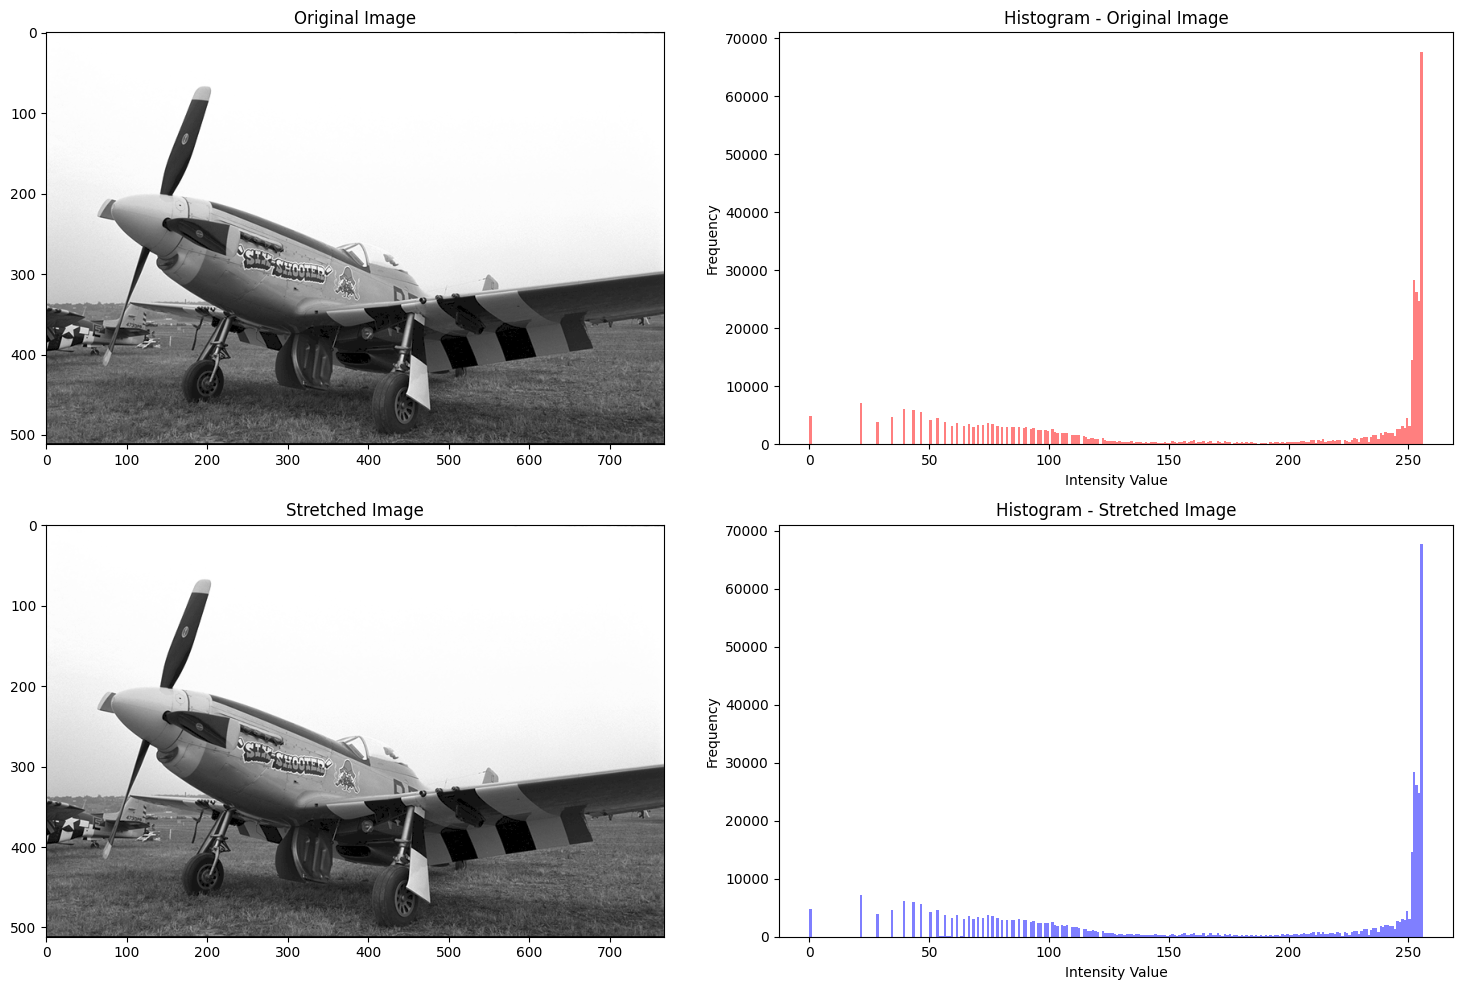

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def linear_stretching(image):
    """
    Performs linear stretching on the input grayscale image.

    Parameters:
        image: numpy array, input grayscale image

    Returns:
        numpy array, linearly stretched image
    """
    # Compute minimum and maximum intensity values
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Linear stretching formula: new_value = (old_value - min_val) * (255 / (max_val - min_val))
    stretched_image = np.uint8((image - min_val) * (255.0 / (max_val - min_val)))
    return stretched_image

# Load the image
image = cv2.imread('part B/IMG_2.png', cv2.IMREAD_GRAYSCALE)

# Perform linear stretching
stretched_image = linear_stretching(image)

# Plot original and stretched images alongside histograms
plt.figure(figsize=(15, 10))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(image.flatten(), bins=256, range=(0, 256), color='r', alpha=0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram - Original Image')

# Stretched image and histogram
plt.subplot(2, 2, 3)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')

plt.subplot(2, 2, 4)
plt.hist(stretched_image.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram - Stretched Image')

plt.tight_layout()
plt.show()
